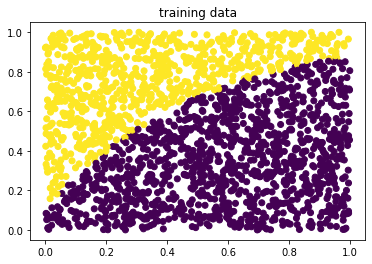

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle

pkl_file = open('classifier_data.pkl', 'rb')
x_train, y_train = pickle.load(pkl_file)

n_train = np.size(y_train)

plt.scatter(x_train[:,0],x_train[:,1], c=y_train[:,0])
plt.title('training data')
plt.show()

In [2]:
def regularized_log_loss_function(X, y, w, lam):
    """
    function takes a matrix X with each column a feature vector, a vector y of labels, 
    takes a w, and returns a scalar representing the value of function in 2b
    """
    m,n = np.shape(X)
    res = 0
    for i in range(n):
        res += np.log(1+np.exp(-y[i]*X[:,[i]].T@w)) 
    res += lam*w.T@w
    return res[0][0]

def gradient(X,y,w,lam,addDimension):
    """
    function takes a matrix X with each column a feature vector, a vector y of labels, 
    takes a w, a lamda parameter which happens to be one in this whole program and a
    boolean value which judges if we need to append the dimensions of the matrix. 
    There are two cases, one requires appending and one does not. This variable 
    facilitates that result.
    """
    if(addDimension==True):
        grad = np.zeros((len(X[0])+1,1))
    else:
        grad = np.zeros((len(X[0]),1))
    
    # grad = np.zeros((len(X[0]),1))
    
    for i in range(len(y)):
        yi = y[i][0]
        xi = X[i]
        if(addDimension==True):
            xiT = np.append(xi, np.array([[1]]))
        else:
            xiT = xi
        
      
        curr = -1*yi*(1-(1/(1+np.exp(-1*yi*(xiT@w)))))*xiT.reshape((len(xiT),1))
        grad = grad + curr
    return (grad + 2*lam*w)

def graddescent(X,y,tau,w_init,it,addDimension=True):
    """
    compute 10 iterations of gradient descent starting at w1
    w_{k+1}= w_k - tau*X'*(X*w_k - y) 
    There is a boolean value which judges if we need to append the dimensions of the matrix. There 
    are two cases, one requires appending and one does not. This variable facilitates that result.
    """
    W = np.zeros((w_init.shape[0],it))
    W[:,[0]] = w_init
    for k in range(it-1):
        #X.T @ (X @ W[:,[k]] - y)
        W[:,[k+1]] = W[:,[k]] - tau * gradient(X,y,W[:,[k]],1,addDimension)
    return W 



# 2 c)

In [3]:
w_init = np.array([[1],[1],[1]])
tau = 0.006
w = graddescent(x_train, y_train, tau, w_init, 95, True)
w = w[:,len(w[0])-1].reshape(len(w),1)
print("w=\n", w)

w=
 [[-6.44281082]
 [ 9.21295439]
 [-2.55074792]]


# 2 d)

Rate of error:  0.035


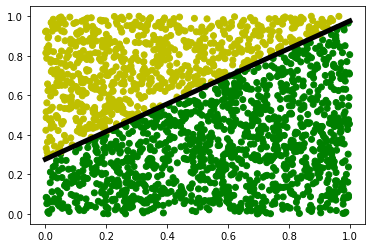

In [4]:
x_train = np.hstack((x_train, np.ones((len(x_train),1))))
yhat = np.sign(x_train@w)
plt.scatter(x_train[:,0],x_train[:,1],color=['g' if i==-1 else 'y' for i in yhat[:,0]])
error_vector = [0 if i[0]==i[1] else 1 for i in np.hstack((yhat, y_train))]
errors =  sum(error_vector)
print("Rate of error: ", errors/len(error_vector))
slope = -w[0,0]/w[1,0]
y_int = -w[2,0]/w[1,0]
plt.plot([0,1], [y_int, y_int + slope], linewidth = 5, color='black')

# 2 e)

weights of least squares:  [[-1.39655874]
 [ 2.29068083]
 [-0.6846757 ]]
Rate of error: 
0.0455


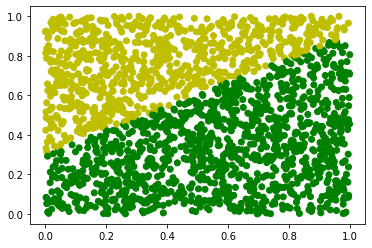

In [5]:
wLS = np.linalg.inv(x_train.T@x_train+np.eye(len(x_train.T)))@x_train.T@y_train
print("weights of least squares: ", wLS)
yhat = np.sign(x_train@wLS)
plt.scatter(x_train[:,0], x_train[:,1], color=['g' if i==-1 else 'y' for i in yhat[:,0]])
error_vector = [0 if i[0]==i[1] else 1 for i in np.hstack((yhat, y_train))]
errors = sum(error_vector)
print("Rate of error: " )
print(errors/len(error_vector))

The error rate is greater (0.0455>0.035) than the one trained by logistic loss. The performance however is similiar.

# 2 f)

Rate of error:  0.024666666666666667


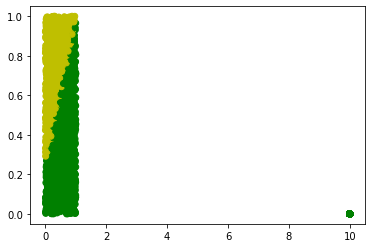

In [6]:
#add new data
pkl_file = open('classifier_data.pkl', 'rb')
x_train, y_train = pickle.load(pkl_file)
x_train = np.hstack((x_train, np.ones((len(x_train),1))))
x_train_mod = x_train
y_train_mod = y_train
for i in range(1000):
    x_train_mod = np.vstack((x_train_mod, np.array([[10,0,1]])))
    y_train_mod = np.vstack((y_train_mod, np.array([[-1]])))
    
#logistic loss classifier
w_init = np.array([[1],[1],[1]])
tau = 0.006
#x_train_mod = np.vstack((x_train_mod, np.ones((1,len(x_train_mod)))))
w = graddescent(x_train_mod, y_train_mod, tau, w_init, 95,False)
w = w[:,len(w[0])-1].reshape(len(w),1)

yhat = np.sign(x_train_mod@w)
plt.scatter(x_train_mod[:,0],x_train_mod[:,1],color=['g' if i==-1 else 'y' for i in yhat[:,0]])
error_vector = [0 if i[0]==i[1] else 1 for i in np.hstack((yhat, y_train_mod))]
errors =  sum(error_vector)
print("Rate of error: ", errors/len(error_vector))

The logistic classifier handles points which are very simple to classify, very well, and even sees the error rate go down.

weights of least squares:  [[ 0.03355812]
 [ 2.25926458]
 [-1.36073308]]
Rate of error: 
0.11933333333333333


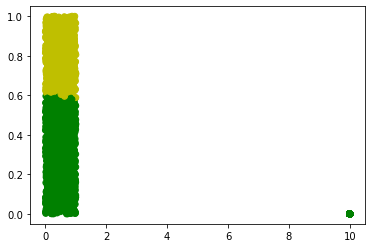

In [7]:
wLS = np.linalg.inv(x_train_mod.T@x_train_mod+np.eye(len(x_train_mod.T)))@x_train_mod.T@y_train_mod
print("weights of least squares: ", wLS)
yhat = np.sign(x_train_mod@wLS)
plt.scatter(x_train_mod[:,0], x_train_mod[:,1], color=['g' if i==-1 else 'y' for i in yhat[:,0]])
error_vector = [0 if i[0]==i[1] else 1 for i in np.hstack((yhat, y_train_mod))]
errors = sum(error_vector)
print("Rate of error: " )
print(errors/len(error_vector))

The square error classifier does not handle the easy-to-classify points very well, and thus sees a huge error rate. It places a large importance on the distance from the boundary. The newly added points in the mod data points, thus have a huge effect on the decision boundary. Thus the error rate is high as we can see.